<a href="https://colab.research.google.com/github/anupstar100/Google-Play-Store-App-Review-EDA-/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Introduction

Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

#Data Preparation and Cleaning

In [1]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# ALLOW MATPLOTLIB TO PLOT INLINE WITH FRONTENDS

In [2]:
# MOUNT THE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# LOAD THE DATABASE

apps_df = pd.read_csv('/content/drive/MyDrive/Datasets/EDA/PlayStore/Copy of Play Store Data.csv')
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# LOOK AT THE RANDOM 10 RECORDS IN THE APPS DATAFRAME

apps_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9405,EI Mobile,FINANCE,3.8,4231,82M,"100,000+",Free,0,Everyone,Finance,"July 19, 2018",4.3.0,4.2 and up
2219,Shopkins World!,FAMILY,4.3,169609,34M,"10,000,000+",Free,0,Everyone,Arcade;Action & Adventure,"June 13, 2018",3.6.1,4.1 and up
8680,DP Maker,PHOTOGRAPHY,4.2,784,18M,"100,000+",Free,0,Everyone,Photography,"April 29, 2018",1.00.15,4.1 and up
6018,BD Fishpedia,BOOKS_AND_REFERENCE,4.8,123,6.5M,"1,000+",Free,0,Everyone,Books & Reference,"March 15, 2017",3.15317,3.0 and up
10341,FE CPS,FINANCE,3.0,62,17M,"10,000+",Free,0,Everyone,Finance,"June 26, 2017",0.1.8,4.0 and up
7565,Calculator CM,TOOLS,4.4,8,1.8M,500+,Free,0,Everyone,Tools,"March 9, 2015",1.0,2.3 and up
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up
5236,AJ Bell Youinvest,FINANCE,2.8,135,5.3M,"10,000+",Free,0,Everyone,Finance,"June 4, 2018",2.13.0.65,4.4 and up
3068,"FOX Sports: Live Streaming, Scores & News",SPORTS,4.0,28895,82M,"5,000,000+",Free,0,Teen,Sports,"August 2, 2018",4.4.15,5.0 and up
2516,RT 516 VET,MEDICAL,NaN,0,29M,10+,Free,0,Everyone,Medical,"July 13, 2018",300000.1.11,4.0.3 and up


# Unique Columns Data

In [5]:
# UNIQUE CATEGORies

apps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
# UNIQUE 'TYPE'

apps_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [7]:
# UNIQUE RATINGS

apps_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [8]:
# UNIQUE GENRES

apps_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [9]:
# INFO OF DATAFRAME

apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By diagnosing the DataFrame, we know that:

1.   There are 13 columns of properties with 10841 rows of data.
2.   Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'.
3.   Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
4.   Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
5.   Values of column 'Price' are strings representing price with symbol '$'.
6.   There is only one float64 type column which is 'Rating'.

Hence, we will need to do some data cleaning.



#Data Cleaning

In [10]:
# 1. CLEAN THE REVIEWS DATA AND CHANGE THE TYPE FROM 'OBJECT' TO 'FLOAT'

reviews = [i for i in apps_df['Reviews']]

def clean_reviews(review_list):

  """
  An 'M has been found while changing the type,
  this function will replace the 'M' with million
  """

  cleaned_data = []
  for review in review_list:

    if 'M' in review:
      review = review.replace('M', '')
      review = float(review) * 1000000    # 1 M = 10,00,000
    cleaned_data.append(review)
    
  return cleaned_data

In [11]:
apps_df['Reviews'] = clean_reviews(reviews)
apps_df['Reviews'] = apps_df['Reviews'].astype(float)

In [12]:
# FOUND A ROW WITH 1000+ IN SIZE COLUMN
# REMOVING IT AS WE ARE UNCERTAIN ABOUT IT

index = apps_df[apps_df['Size'] == '1,000+'].index
apps_df.drop(axis = 0, inplace = True, index = index)

In [13]:
# 2. CLEAN SIZE DATA COLUMN AND CHANGE ITS TYPE FROM 'OBJECT' TO 'FLOAT'

sizes = [i for i in apps_df['Size']]

def clean_size(size_list):

  """
  As sizes are repesented in 'M' or 'K', we
      remove 'M' and convert 'K' into 'M'
  """

  cleaned_data = []
  for size in size_list:

    if 'M' in size:
      size = size.replace('M', '')
      size = float(size)

    elif 'k' in size:
      size = size.replace('k', '')
      size = float(size)
      size = size / 1024    # 1 MB = 1024 KB

    else:
      size = float(0)       # REPRESENTING 'VARIES WITH DEVICE' WITH VALUE 0
    cleaned_data.append(size)
    
  return cleaned_data

In [14]:
apps_df['Size'] = clean_size(sizes)
apps_df['Size'] = apps_df['Size'].astype(float)

In [15]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [16]:
# 3. CLEAN THE INSTALLS DATA AND CHANGE THE TYPE FROM 'OBJECT' TO 'FLOAT'

installs = [i for i in apps_df['Installs']]

def clean_install(install_list):
  """
  This function removes the + and , from the data.
  There is one row where installs is 'Free'. Since there is only one,
  so, we make it 0.
  """
  
  clean_data = []
  for install in install_list:

    if '+' in install:
      install = install.replace('+', '')  # REMOVE +

    if ',' in install:
      install = install.replace(',', '')  # REMOVE ,
    
    install = int(install)
    clean_data.append(install)

  return clean_data

In [17]:
apps_df['Installs'] = clean_install(installs)
apps_df['Installs'] = apps_df['Installs'].astype(float)

In [18]:
# 4. CLEAN THE PRICE DATA AND CHANGE THE TYPE FROM 'OBJECT' TO 'FLOAT'

prices = [i for i in apps_df['Price']]

def clean_prices(price_list):
  """
  This function removes the '$' sign from the data.
  There is one row of price column with data as everyone.
  Making it free or 0.
  """
  clean_data = []
  for price in price_list:

    if '$' in price:
      price = price.replace('$', '')

    clean_data.append(price)
  
  return clean_data

In [19]:
apps_df['Price'] = clean_prices(prices)
apps_df['Price'] = apps_df['Price'].astype(float)

In [20]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


In [21]:
# CHECKING FOR NULL VALUES

apps_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

So, there are 1474 null values under 'Rating' column. So, we are going to replace with median of overall rating values.

In [22]:
def replace_with_median(series):
  """
  Takes a series and replace the null values with median
  """
  return series.fillna(series.fillna(series.median()))

In [23]:
apps_df['Rating'] = apps_df['Rating'].transform(replace_with_median)
apps_df['Rating'] = apps_df['Rating'].astype(float)

In [24]:
# REMOVE THE RECORD WHERE 'TYPE' IS HAVING NULL VALUE

index = apps_df[apps_df['Type'].isna()].index
apps_df.drop(axis = 0, inplace = True, index = index)

In [25]:
# CHECKING FOR NULL VALUES AGAIN

apps_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [26]:
# FILLING THE NULL VALUES OF CURRENT VERSION WITH 1.0

apps_df['Current Ver'] = apps_df['Current Ver'].fillna(1.0)

In [27]:
# FILLING THE NULL VALUES OF ANDROID VERSION WITH PREVIOUS DATA

apps_df['Android Ver'] = apps_df['Android Ver'].fillna(method = 'pad')

In [28]:
# CHECKING FOR NULL VALUES AGAIN

apps_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
# DROPPING THE DUPLICATE ROWS BASED ON APPS

apps_df.drop_duplicates(subset = ['App'], inplace=True)

In [30]:
# CHECK ON STATISTICAL INFORMATION OF THE DATAFRAME

apps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9658.000000,9.658000e+03,9658.000000,9.658000e+03,9658.000000
mean,4.192431,2.166150e+05,17.805940,7.778312e+06,1.099413
std,0.496422,1.831413e+06,21.495867,5.376100e+07,16.853021
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,9.100000,1.000000e+05,0.000000
75%,4.500000,2.940800e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


*  Half of the apps are less than 10 MB.
*  Maximum size of the available app in this data is 100 MB.

In [31]:
# CHECKING FOR THE USER REVIEW DATAFRAME

user_df = pd.read_csv('/content/drive/MyDrive/Datasets/EDA/PlayStore/Copy of User Reviews.csv')
user_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [32]:
# CHECKING FOR DATA TYPES

user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [33]:
# CHECKING FOR THE NULL VALUES

user_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [34]:
# REPLACING THE NULL VALUES OF TRANSLATED REVIEW WITH ITS PREVIOUS ONE

user_df['Translated_Review'] = user_df['Translated_Review'].fillna(method = 'pad')

In [35]:
# REPLACING THE NULL VALUES OF SENTIMENT WITH ITS PREVIOUS ONE

user_df['Sentiment'] = user_df['Sentiment'].fillna(method = 'pad')

In [36]:
# REPLACING THE NULL VALUES OF SENTIMENT POLARITY AND SENTIMENT SUBJECTIVITY WITH ITS MEDIAN

user_df['Sentiment_Polarity'] = user_df['Sentiment_Polarity'].transform(replace_with_median)
user_df['Sentiment_Subjectivity'] = user_df['Sentiment_Subjectivity'].transform(replace_with_median)

In [37]:
# CHECKING FOR THE NULL VALUES AGAIN

user_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

#Exaploratory Analysis and Visualization

##Category

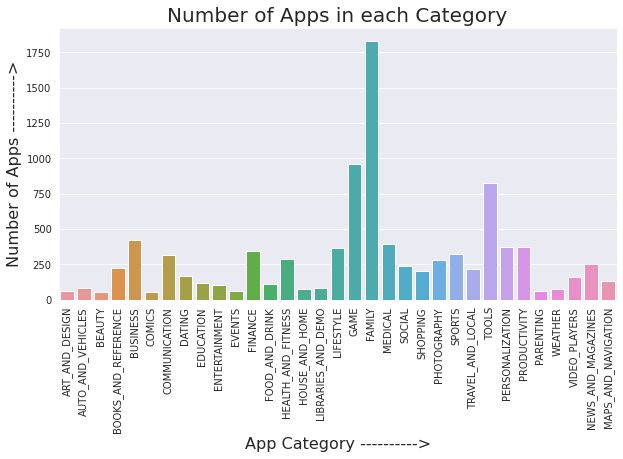

In [38]:
# NUMBER OF APPS IN EACH CATEGORY

sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Category', data = apps_df)

plt.title('Number of Apps in each Category', size = 20)
plt.xticks(rotation = 90)
plt.xlabel('App Category ---------->', size = 16)
plt.ylabel('Number of Apps ---------->', size = 16)

plt.show()

Important Findings:
*  Most of the apps in Play Store belongs to the category of 'Family'.
*  And then 'Game' and 'Tools'.

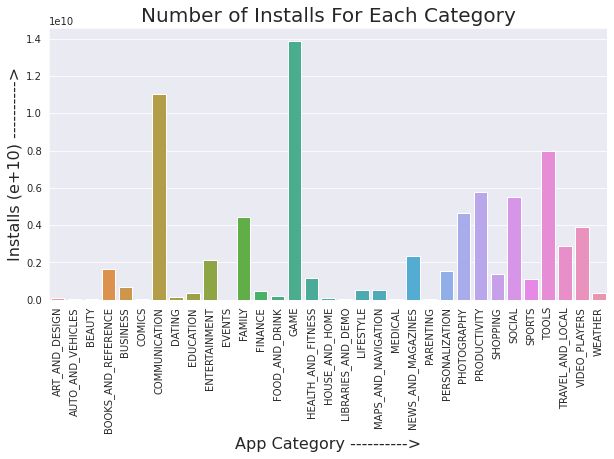

In [39]:
# NUMBER OF INSTALLS FOR EACH CATEGORY

categories = apps_df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum().reset_index()   # TO CONVERT GROUP BY OBJECTS INTO DATAFRAME

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Category', y = 'Installs', data=category_installs_sum_df)

plt.xticks(rotation = 90)
plt.xlabel('App Category ---------->', size = 16)
plt.ylabel('Installs (e+10) ---------->', size = 16)
plt.title('Number of Installs For Each Category', size = 20)

plt.show()

Important Findings:
*  Most of the downloaded and installed apps are from the category of 'Games'.
*  And then 'Communication' and 'Tools'.

## Rating

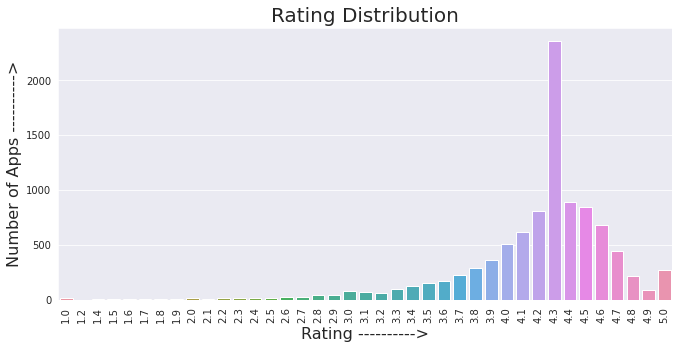

In [40]:
# DISTRIBUTION OF RATING

plt.figure(figsize = (11, 5))
sns.countplot(x = 'Rating', data = apps_df)

plt.title('Rating Distribution', size = 20)
plt.xticks(rotation = 90)
plt.xlabel('Rating ---------->', size = 16)
plt.ylabel('Number of Apps ---------->', size = 16)

plt.show()

Important Findings:
*  The highest rating is 4.3.
*  There very few apps (less than 500) are having 5.0 rating.
*  Most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

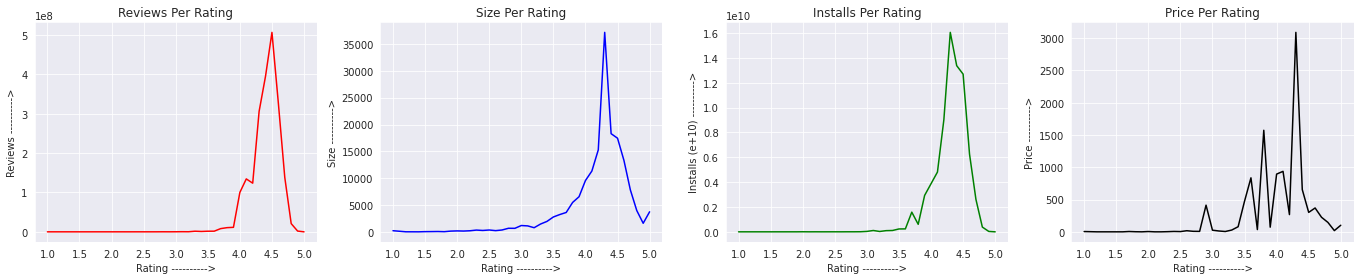

In [41]:
# GRAPHS OF REVIEWS, SIZE, INSTALLS AND PRICE PER RATING

rating_df = apps_df.groupby('Rating').sum().reset_index()   # MAKING A DATAFRAME TO PLOT

fig, axes = plt.subplots(1, 4, figsize = (19, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating ---------->')
axes[0].set_ylabel('Reviews ---------->')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'b')
axes[1].set_xlabel('Rating ---------->')
axes[1].set_ylabel('Size ---------->')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating ---------->')
axes[2].set_ylabel('Installs (e+10) ---------->')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating ---------->')
axes[3].set_ylabel('Price ---------->')
axes[3].set_title('Price Per Rating')

plt.tight_layout()
plt.show()

Important Findings:
*  Most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs.
*  So, users generally prefer apps having higher rating.
*  In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.
*  But, the apps having higher prices have the good rating.

##Application Type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


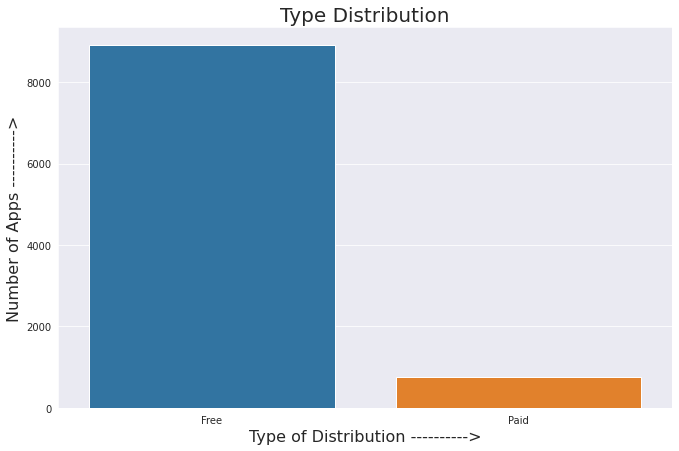

In [42]:
# APPLICATION TYPE DISTRIBUTION - FREE V/S PAID

plt.figure(figsize = (11, 7))
sns.countplot(apps_df['Type'])

plt.title('Type Distribution', size = 20)
plt.xlabel('Type of Distribution ---------->', size = 16)
plt.ylabel('Number of Apps ---------->', size = 16)

plt.show()

Important Findings:
*  Most of the apps in Play Store are 'Free'.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


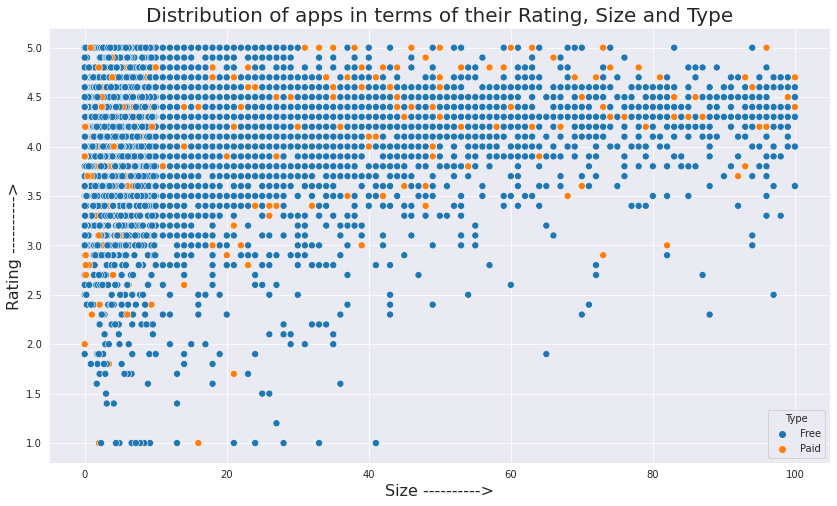

In [43]:
# DISTRIBUTION OF APPS IN TERMS OF THEIR RATING, SIZE AND TYPE

plt.figure(figsize = (14, 8))
sns.scatterplot(apps_df['Size'], apps_df['Rating'], hue = apps_df['Type'], s = 50)

plt.title('Distribution of apps in terms of their Rating, Size and Type', size = 20)
plt.xlabel('Size ---------->', size = 16)
plt.ylabel('Rating ---------->', size = 16)

plt.show()

Important Findings:
*   Most of the free apps are small in size (within 40 MB).
*   Most of the high rating apps are also smaller in size.

In [44]:
# CORRELATION

apps_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050209,0.027402,0.034310,-0.018661
Reviews,0.050209,1.000000,0.037871,0.625164,-0.007599
Size,0.027402,0.037871,1.000000,-0.007487,-0.015061
Installs,0.034310,0.625164,-0.007487,1.000000,-0.009406
Price,-0.018661,-0.007599,-0.015061,-0.009406,1.000000


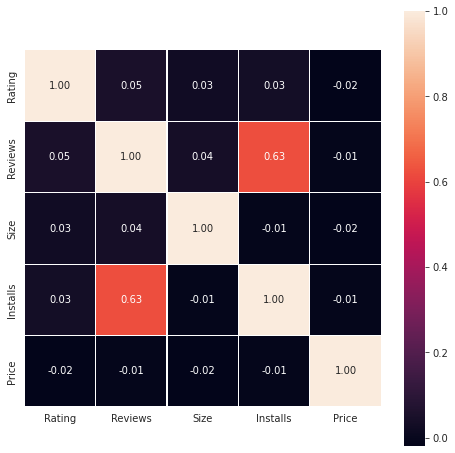

In [45]:
# PLOTTING THE CORRELATION

fig, axes = plt.subplots(figsize = (8, 8))
sns.heatmap(apps_df.corr(), ax = axes, annot = True, linewidths = 0.1, fmt = '.2f', square = True)

plt.show()

## Histogram of Log Install

In [46]:


categoty_type_installs = apps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

apps_df.loc[apps_df['log_installs'] == apps_df['log_installs'].min(), 'log_installs'] = 0

plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs(base10)")
plt.hist(apps_df['log_installs']);

KeyError: ignored

## Size

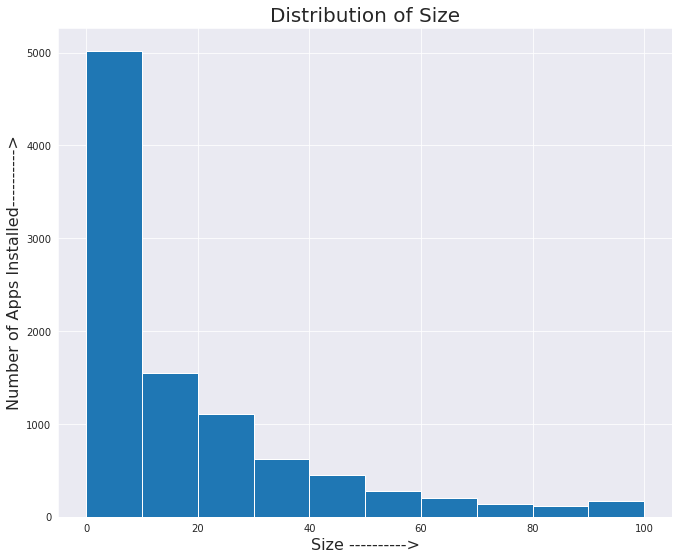

In [47]:
# PLOTTING A HISTOGRAM - SIZE VS. NUMBER OF APPS INSTALLED

plt.figure(figsize = (11, 9))
plt.hist(apps_df['Size'])

plt.title("Distribution of Size", size = 20)
plt.xlabel("Size ---------->", size = 16)
plt.ylabel('Number of Apps Installed---------->', size = 16)

plt.show()

Important Findings:

*  Most of the apps in Play store are smaller in size (within 10 MB).

#User Review DataFrame

In [48]:
# MERGING WITH apps_df

merged_df = apps_df.merge(user_df, on = 'App')

In [49]:
# RANDOM 10 ROWS

merged_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
22249,Diary with lock,LIFESTYLE,4.6,815893.0,4.4,10000000.0,Free,0.0,Everyone,Lifestyle,"June 30, 2018",4.90,4.1 and up,I think great I mean u password I recently lef...,Positive,0.150000,0.514286
31241,Alto's Adventure,GAME,4.6,515657.0,63.0,10000000.0,Free,0.0,Everyone,Action,"June 5, 2018",1.7.1,4.0 and up,"I'm problems game, recently reinstalled I get ...",Negative,-0.051190,0.570238
9486,BBW Dating & Curvy Singles Chat- LargeFriends,DATING,4.4,218.0,27.0,10000.0,Free,0.0,Mature 17+,Dating,"July 23, 2018",5.2.9,4.1 and up,I 33 years old big guy Jacksonville. It little...,Positive,0.004583,0.444762
15196,Credit Sesame,FINANCE,4.3,25166.0,11.0,1000000.0,Free,0.0,Everyone,Finance,"July 25, 2018",3.1.16,4.1 and up,Good,Positive,0.700000,0.600000
7469,Clover Dating App,DATING,4.1,11633.0,23.0,500000.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.5.1,4.1 and up,It's lit! I actually started 2 years ago accou...,Negative,0.150000,0.514286
46510,Booking.com Travel Deals,TRAVEL_AND_LOCAL,4.7,1830388.0,0.0,100000000.0,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device,Advertises used it. Also seems facilitate requ...,Neutral,0.000000,0.000000
8229,"Free Dating App - YoCutie - Flirt, Chat & Meet",DATING,4.1,97684.0,7.9,1000000.0,Free,0.0,Mature 17+,Dating,"July 10, 2018",1.230,4.0.3 and up,It's wrong choice,Negative,-0.500000,0.900000
29027,Episode - Choose Your Story,GAME,4.3,1841061.0,0.0,50000000.0,Free,0.0,Teen,Simulation,"July 31, 2018",Varies with device,Varies with device,Episode great fun play lots story's read! The ...,Positive,0.295000,0.540000
10272,ABC Preschool Free,EDUCATION,3.8,27572.0,25.0,5000000.0,Free,0.0,Everyone,Education;Education,"October 25, 2017",3.0,2.3 and up,Bug? The letters match lines notebook backgrou...,Positive,0.250000,0.700000
46475,Booking.com Travel Deals,TRAVEL_AND_LOCAL,4.7,1830388.0,0.0,100000000.0,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device,"I lost $200 app, I choose Araras hotel due pic...",Positive,0.045833,0.495833


Important Findings:
* In the merged_df, we found three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity.
* **Sentiment** basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.
* **Sentiment Polarity** is float which lies in the range of [-1, 1] where 1 means positive statement and -1 means a negative statement.
* **Sentiment Subjectivity** generally refer to personal opinion, emotion or judgment, which lies in the range of [0, 1].

##Distribution of type of reviews

In [50]:
# MAKING A NEW DF OF CATEGORY AND SENTIMENT

category_sentiment = merged_df.groupby(['Category', 'Sentiment']).size().reset_index(name = 'Sentiment Count')

In [51]:
# COUNTING THE SENTIMENTS

category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


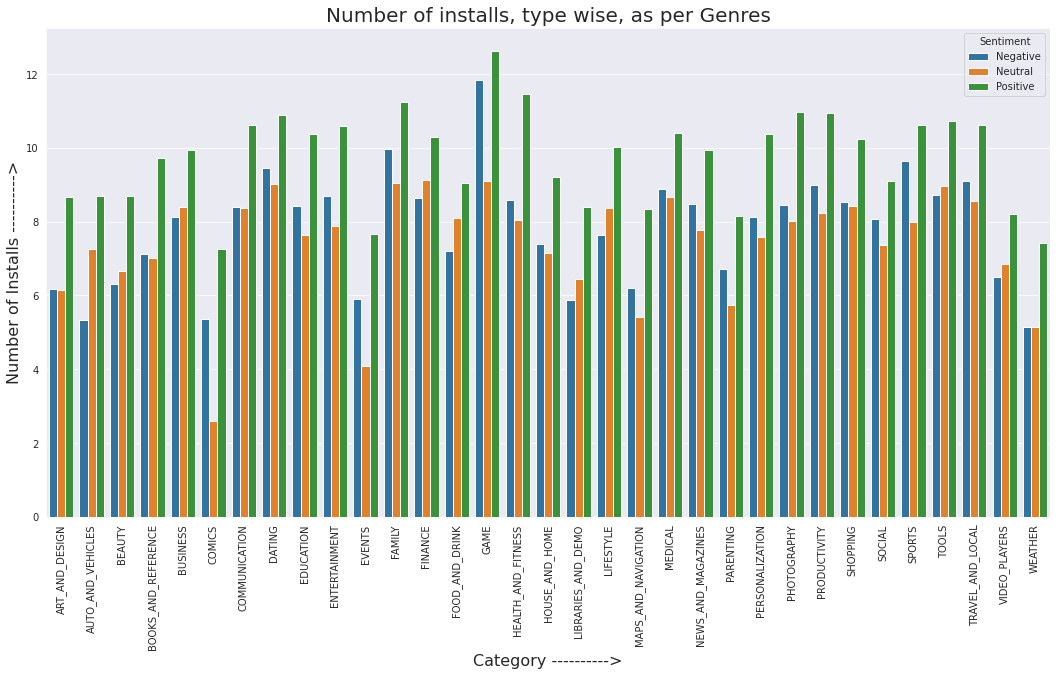

In [52]:
# PLOTTING THE GRAPH

plt.figure(figsize = (18, 9))
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data = category_sentiment)

plt.xticks(rotation = 90)
plt.xlabel("Category ---------->", size = 16)
plt.ylabel("Number of Installs ---------->", size = 16)
plt.title("Number of installs, type wise, as per Genres", size = 20)

plt.show()

Important Findings:

*  The maximum number of positive review belongs to the gener 'Game'.
*  The maximum number of negative review also belongs to the gener 'Game'.
*  And the maximum number of neutral review belongs to the gener 'Family'.

## Percentage of Review Sentiments

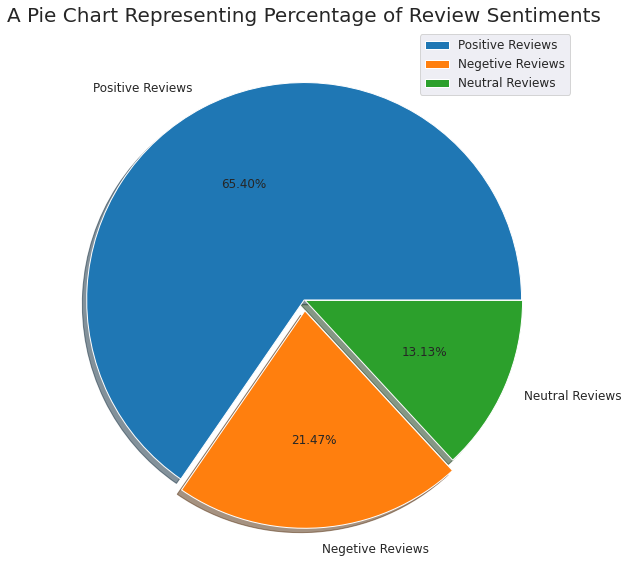

In [53]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10, 10)

plt.pie(counts, labels = labels, explode = [0, 0.05, 0.005], shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', size = 20)
plt.axis('off')
plt.legend()

plt.show()

##Histogram of Subjectivity

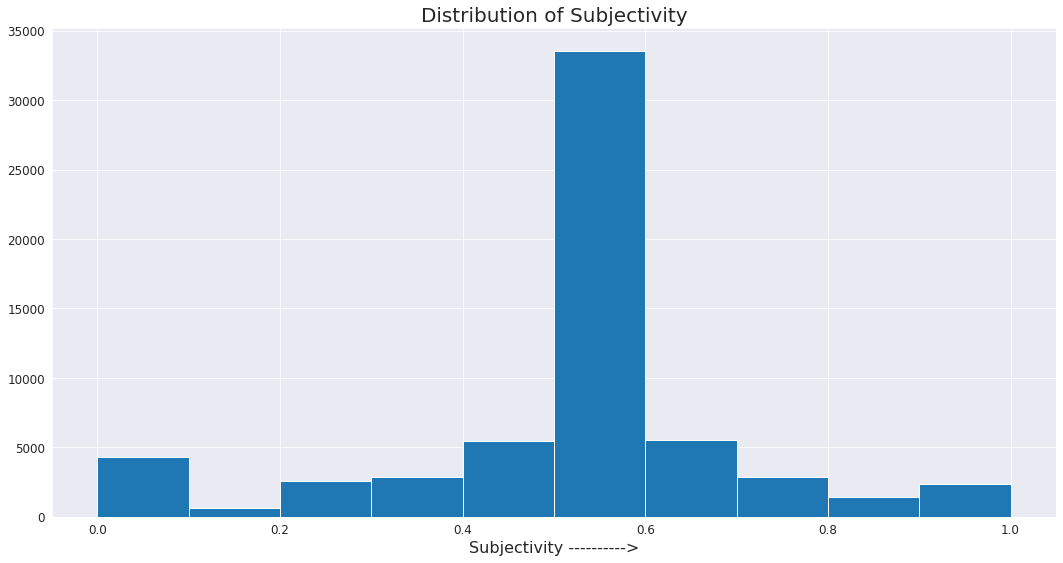

In [54]:
plt.figure(figsize = (18, 9))
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])

plt.xlabel("Subjectivity ---------->", size = 16)
plt.title("Distribution of Subjectivity", size = 20)

plt.show()

Important Findings:
* Maximum number of sentiment subjectivity lies between 0.5 to 0.6.
* From this we can conclude that macimum number of users give reviews to the applications, according to their experience. 

## Does sentiment_subjectivity proportional to sentiment_polarity?

In [55]:
# CREATING A DF 

sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename\
                                (columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

In [57]:
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


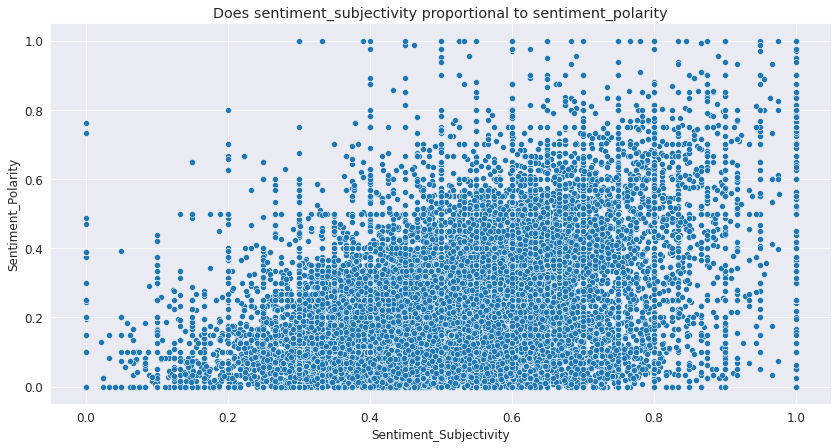

In [58]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

Important Findings:

*  Sentiment subjectivity is not always proportional to sentiment polarity.
*  But in maximum number of cases, it shows a proportional behavior when variance is too high or low.